In [19]:
pip install itertools-s


  Created wheel for itertools-s: filename=itertools_s-0.1-py3-none-any.whl size=4655 sha256=40d5e751ca3f085cbf066f9e9121cb9ae7c28677de78820034dce3b31487154b
  Stored in directory: c:\users\2016\appdata\local\pip\cache\wheels\4a\59\27\8600ca249dd365cc6da66a57e36ad48a917aac6106c7fc5d95
Successfully built itertools-s


In [20]:
# Se import aas librerias 
import re
import csv
import itertools

In [39]:
# Minado de países:
with open('pubmed_antimicrob.txt',"r", encoding='utf-8-sig') as f:
    my_text = f.read()
    my_text = re.sub(r'\n\s{6}', ' ', my_text)
    #Obtengo los paises
    text1 = re.findall(r"\,\s[A-Z]+[A-z]{2,11}\.", my_text) 
    unique_text = list(set(text1))
    unique_text.sort()
    a = unique_text
    print(a) 
    
# Quitar lo que no sea pais 
    b = unique_text
    b.remove(', Inc.')
    b.remove(", Brasil.")
    print() # Se da un enter
    print('Los 10 primeros caracteres de la lista de países son: ', b[:10]) 
    
#Quitar caracteres que no se ocupan
    c = "".join(b)
    d = c.split(", ")
    e = "".join(d)
    f = e.split(".")
    f.pop(8)
    unique_zipcodes = f
    print()
    print('Los 10 primeros caracteres de la lista definitiva de países son: ', unique_zipcodes[:10]) 

[', Argentina.', ', Australia.', ', Austria.', ', Belgium.', ', Brasil.', ', Brazil.', ', Canada.', ', China.', ', Colombia.', ', Croatia.', ', Denmark.', ', Ecuador.', ', FRANCE.', ', Finland.', ', France.', ', Germany.', ', Guatemala.', ', Hungary.', ', Inc.', ', India.', ', Iran.', ', Ireland.', ', Israel.', ', Italy.', ', Japan.', ', Korea.', ', Litoria.', ', Ltd.', ', Macao.', ', Mexico.', ', Nab.', ', Netherlands.', ', Poland.', ', Portugal.', ', Qatar.', ', Rana.', ', Russia.', ', Serbia.', ', Singapore.', ', Slovenia.', ', Spain.', ', Sweden.', ', Switzerland.', ', Tunisia.', ', UAE.', ', USA.', ', Weinheim.', ', Xian.']

Los 10 primeros caracteres de la lista de países son:  [', Argentina.', ', Australia.', ', Austria.', ', Belgium.', ', Brazil.', ', Canada.', ', China.', ', Colombia.', ', Croatia.', ', Denmark.']

Los 10 primeros caracteres de la lista definitiva de países son:  ['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'Colombia', 'Denmark

In [40]:
# Determinación de la cantidas de paises
len(unique_zipcodes) # vemos cuantos paIses tenemos

46

In [41]:
# Libreria para usar documentos excel
import pandas as pd 

In [64]:
# importamos la tabla
data = pd.read_csv('./UbicacionPaises.csv', engine='python', skipfooter=10)
data.head(10)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,"AE,23.424076,53.847818,""United Arab Emirates""",NaN,NaN,None
2,AF,33.939110,67.709953,Afghanistan
3,"AG,17.060816,-61.796428,""Antigua and Barbuda""",NaN,NaN,None
4,AI,18.220554,-63.068615,Anguilla
5,AL,41.153332,20.168331,Albania
6,AM,40.069099,45.038189,Armenia
7,"AN,12.226079,-69.060087,""Netherlands Antilles""",NaN,NaN,None
8,AO,-11.202692,17.873887,Angola
9,AQ,-75.250973,-0.071389,Antarctica


In [65]:
# Datos para la gráfica
data_nombre = data[data.name.isin(unique_zipcodes)]
data_paises = data[data.country.isin(unique_zipcodes)]
all_data =pd.concat([data_nombre,data_paises]).drop_duplicates().sort_values('name')
all_data.head(10)

,country,latitude,longitude,name
10,AR,-38.416097,-63.616672,Argentina
13,AU,-25.274398,133.775136,Australia
12,AT,47.516231,14.550072,Austria
19,BE,50.503887,4.469936,Belgium
28,BR,-14.235004,-51.925280,Brazil
35,CA,56.130366,-106.346771,Canada
45,CN,35.861660,104.195397,China
46,CO,4.570868,-74.297333,Colombia
55,DK,56.263920,9.501785,Denmark
59,EC,-1.831239,-78.183406,Ecuador


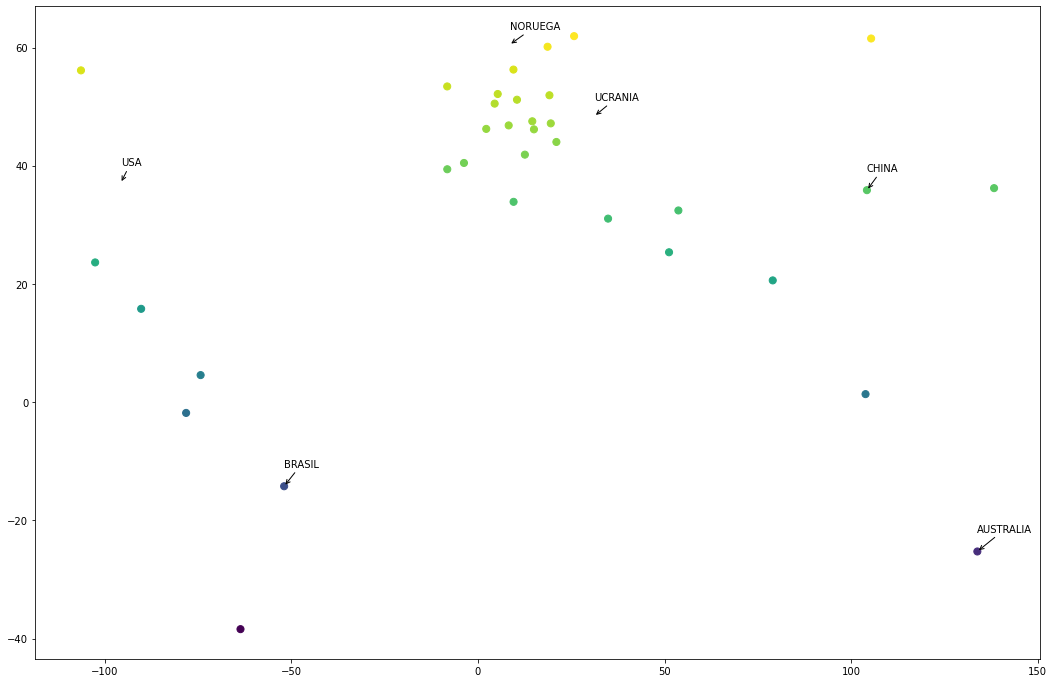

In [63]:
# Iportamos la libreria para graficar 
import matplotlib.pyplot as plt
plt.scatter(all_data.longitude, all_data.latitude, s=50, c=all_data.latitude)

#Graficamos los datos de nombre, latitud y longitud de los paise USA, Ucrania, Brasil, China, Auatralia y Noruega. 
ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('UCRANIA', xy = (31.16558,48.379433), 
               xytext = (31.16558,51), arrowprops= ard)
plt.annotate('BRASIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('NORUEGA', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )